In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [109]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Preprocessing

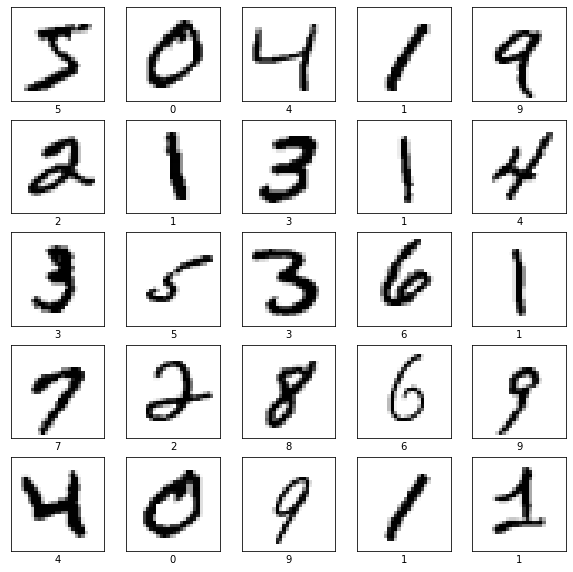

In [110]:
# Visualize some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [111]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


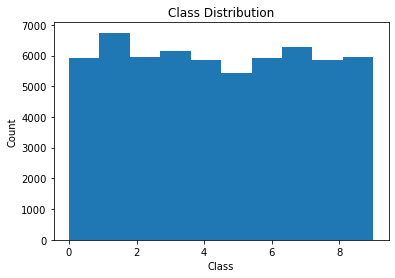

In [112]:
plt.hist(y_train, bins=10)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [113]:
print("Missing values in x_train: ", np.isnan(x_train).any())
print("Missing values in x_test: ", np.isnan(x_test).any())

Missing values in x_train:  False
Missing values in x_test:  False


In [114]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [115]:
# Check the minimum and maximum values after normalization
print('Minimum pixel value in x_train:', x_train.min())
print('Maximum pixel value in x_train:', x_train.max())
print('Minimum pixel value in x_test:', x_test.min())
print('Maximum pixel value in x_test:', x_test.max())

Minimum pixel value in x_train: 0.0
Maximum pixel value in x_train: 1.0
Minimum pixel value in x_test: 0.0
Maximum pixel value in x_test: 1.0


In [116]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [117]:
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)


## Data Augmentation


In [118]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)
    ]
)

In [119]:
augmented_x_train = data_augmentation(x_train)

C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


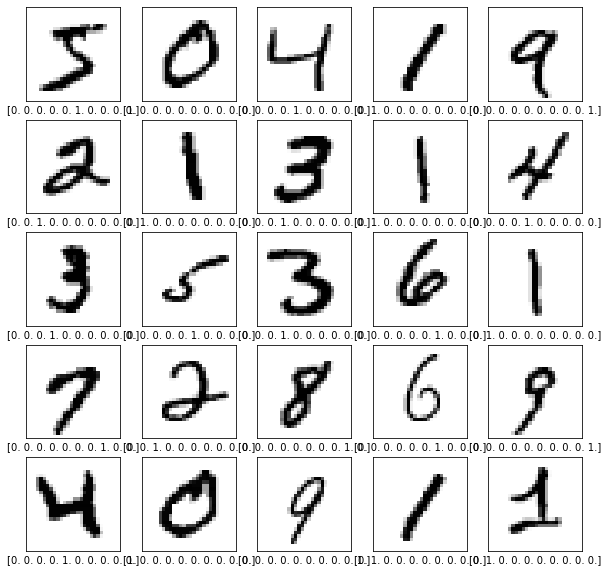

In [120]:
# Visualize some augmented examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Model

In [122]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [123]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [124]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
history = model.fit(augmented_x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4193 - accuracy: 0.8715 - val_loss: 0.1399 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2212 - accuracy: 0.9353 - val_loss: 0.1085 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1864 - accuracy: 0.9460 - val_loss: 0.0969 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1611 - accuracy: 0.9534 - val_loss: 0.0970 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1487 - accuracy: 0.9564 - val_loss: 0.0929 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1405 - accuracy: 0.9590 - val_loss: 0.0815 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1308 - accuracy: 0.9620 - val_loss: 0.0855 - val_accur

In [126]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0846 - accuracy: 0.9765


[0.08464185148477554, 0.9764999747276306]

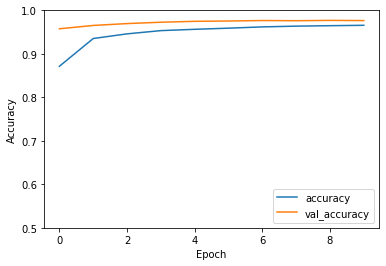

In [127]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

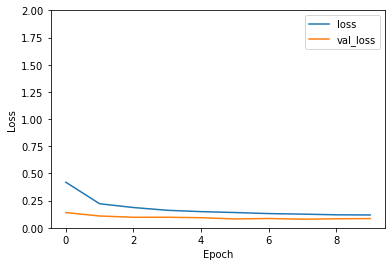

In [128]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()

313/313 [==============================] - 1s 3ms/step


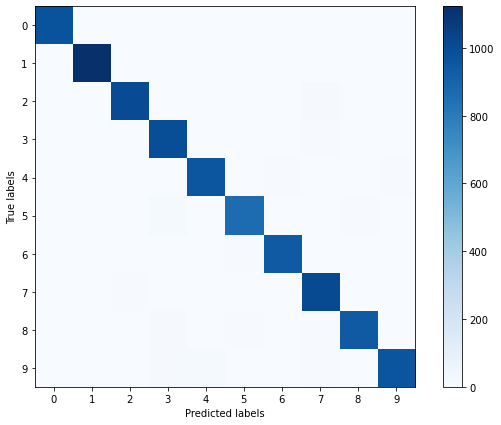

In [129]:
predictions = model.predict(x_test)
confusion_matrix = tf.math.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)).numpy()
plt.figure(figsize=(10, 7))
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(0, 10), [str(i) for i in range(10)])
plt.yticks(np.arange(0, 10), [str(i) for i in range(10)])
plt.colorbar()

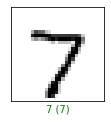

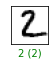

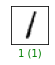

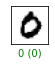

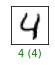

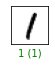

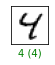

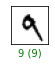

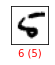

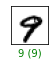

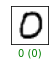

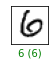

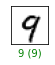

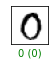

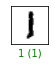

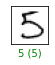

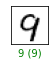

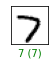

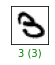

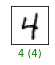

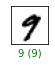

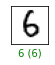

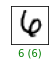

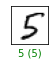

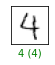

In [130]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
    plt.show()